## Authentications

In [3]:
# AUTHENTICATE to Google Colab
from google.colab import auth
auth.authenticate_user()

In [4]:
# IMPORT & MOUNT midscwa gDrive so we can access the .csv with CWA determinations & image files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Python Packages

In [5]:
# IMPORT PACKAGES
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display
import pandas as pd
from pandas import read_csv
from osgeo import gdal
import time
import os
from osgeo import gdal


## Download Images from GCS to gDrive

In [ ]:
# download images from GCS to GDrive

# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/mndwi /content/drive/My\ Drive/Radhika/images/final2/hires/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/mndvi /content/drive/My\ Drive/Radhika/images/final2/hires/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/gmndwi /content/drive/My\ Drive/Radhika/images/final2/hires/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/srtm /content/drive/My\ Drive/Radhika/images/final2/hires/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/seasonality /content/drive/My\ Drive/Radhika/images/final2/hires/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/hires/transition /content/drive/My\ Drive/Radhika/images/final2/hires/

# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/lores/mndwi /content/drive/My\ Drive/Radhika/images/final2/lores/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/lores/mndvi /content/drive/My\ Drive/Radhika/images/final2/lores/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/lores/gmndwi /content/drive/My\ Drive/Radhika/images/final2/lores/
# !gsutil -m cp -r gs://pollutemenot-ai/GEE_images_final2/lores/srtm /content/drive/My\ Drive/Radhika/images/final2/lores/


## Setup Local Paths

In [ ]:
# set local path to hires images on midscwa gDrive
img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/mndvi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/gmndwi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/srtm/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/seasonality/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/hires/transition/"

# set local path to lores images on midscwa gDrive
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/mndvi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/gmndwi/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/srtm/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/seasonality/"
# img_dir = r"/content/drive/MyDrive/Radhika/images/final2/lores/transition/"

# set local path to cwa determinations on midscwa gDrive
datapath = "/content/drive/MyDrive/Radhika/Data_combined_regular_clean.csv"


## Quick Checks

In [ ]:
# count number of records/CWA determinations
df_labels = read_csv(datapath, delimiter=',')
df_labels.head()#.iloc[99]
df_labels = df_labels[['da_number', 'cwa_determination']]
print(df_labels.shape)
df_labels.head()

(14619, 2)


,da_number,cwa_determination
0,LRB-1983-10120,0
1,LRB-1985-69031,1
2,LRB-1986-99614,1
3,LRB-1990-97632,1
4,LRB-1991-98611,1


## Generate list of image paths

In [ ]:
# count number of images downloaded onto midscwa gDrive
tif_list = [f for f in Path(img_dir).iterdir() if '.tif' in str(f)]
print(len(tif_list))

3180


In [ ]:
tif_list[0]


PosixPath('/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/5720_NAB-2017-00499-M24_mndwi_hires.tif')

In [ ]:
var_name = tif_list[0].name.split('_')[2:3]
var_name


['mndwi']

## Generate an array for each image

In [ ]:
# make a dataframe from the list of image paths
df = pd.DataFrame(tif_list, columns=['img_path'])
df.head()

,img_path
0,/content/drive/MyDrive/Radhika/images/final2/h...
1,/content/drive/MyDrive/Radhika/images/final2/h...
2,/content/drive/MyDrive/Radhika/images/final2/h...
3,/content/drive/MyDrive/Radhika/images/final2/h...
4,/content/drive/MyDrive/Radhika/images/final2/h...


In [ ]:
def create_array(tif_image):
    try:
        p = gdal.Open(str(tif_image))
        channels = p.RasterCount

        # iterate through rasters and add each to the list of layer_list
        layer_list = [np.array(p.GetRasterBand(i).ReadAsArray()) for i in range(1,channels+1)] 

    except: 
        print("Error with image:", tif_image)
        return np.nan

    return np.array(layer_list).astype(float)


In [ ]:
# test function
tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_mndwi_hires.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_mndvi_hires.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_gmndwi_hires.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_srtm_hires.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_seasonality_hires.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/hires/mndwi/4_LRB-1990-97632_transition_hires.tif'

# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_mndwi_lores.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_mndvi_lores.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_gmndwi_lores.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_srtm_lores.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_seasonality_lores.tif'
# tif_image = '/content/drive/MyDrive/Radhika/images/final2/lores/mndwi/4_LRB-1990-97632_transition_lores.tif'

create_array(tif_image).shape

(1, 256, 256)

# Checking for Normal Distribution

## Plot population distribution

(array([[0.0000e+00, 1.6287e+04, 4.3820e+04, ..., 5.4900e+02, 1.3870e+03,
         0.0000e+00],
        [0.0000e+00, 3.2950e+04, 3.1501e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 2.1030e+03, 3.8427e+04, ..., 6.8300e+02, 1.5948e+04,
         5.2500e+02],
        ...,
        [0.0000e+00, 9.8240e+03, 3.4777e+04, ..., 4.4000e+01, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.6620e+03, 4.5142e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.2742e+04, 4.2972e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]),
 array([-0.99821906, -0.79912708, -0.6000351 , -0.40094312, -0.20185114,
        -0.00275916,  0.19633282,  0.39542479,  0.59451677,  0.79360875,
         0.99270073]),
 <a list of 3180 Lists of Patches objects>)

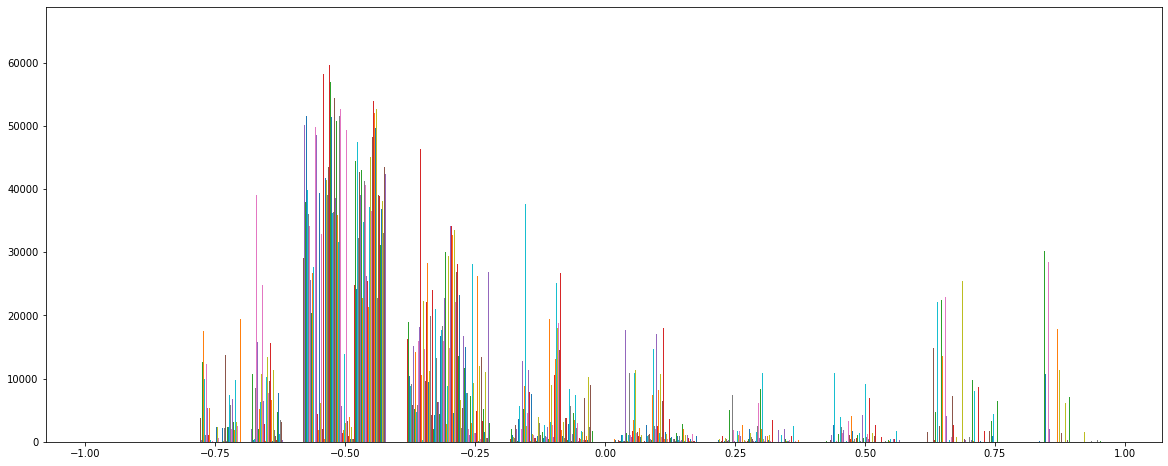

In [ ]:
# create an array of each image
image_series = df.img_path.apply(create_array)

# compute pixel values of image
pixel_values = image_series.apply(lambda x: x)

# plot histogram and check for normal distribution
fig = plt.figure(figsize=(20, 8))
plt.hist(pixel_values)

## Plot sample means distribution

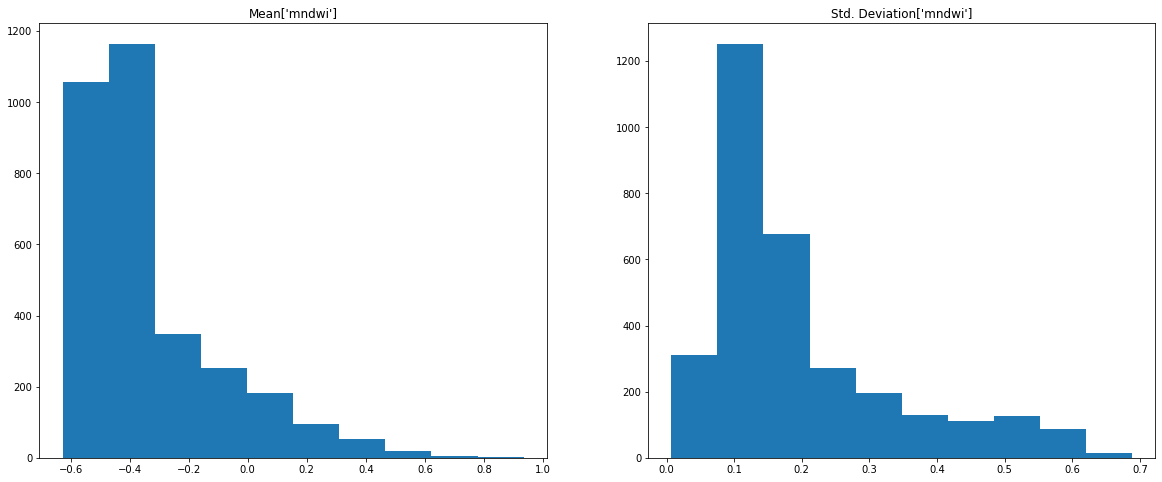

In [ ]:
# create an array of each image
image_series = df.img_path.apply(create_array)

# compute mean pixel values of image
mean_pixel_value = image_series.apply(lambda x: np.nanmean(x))

# compute std of pixel values of image
std_pixel_value = image_series.apply(lambda x: np.nanstd(x))

# plot the distributions of means and stds
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.gca().set_title('Mean'+ str(var_name))
plt.hist(mean_pixel_value, bins=10)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.gca().set_title('Std. Deviation' + str(var_name))
plt.hist(std_pixel_value, bins=10)

plt.show()



Conclusion: The distribution of MNDWI pixel values is non-normal. The distribution of sample means is left skewed. Data needs to be normalized

## Normalize distribution

### Option 1: Eliminate outliers or extreme values

We cannot eliminate based on pixel values as the low values help identify water and vegetation.

### Option 2: Trim long tails
(based on 2-3 std. deviations from the mean)

We cannot eliminate images that fall in the long tail as we do not know what those images represent. Perhaps we can extract a few images that have a mean pixel value of > - 0.3 to investigate.

In [ ]:
# iterate through image_dir
# return image name if mean of pixel values is < -0.3


### Option 3: Power transforms 
(reciprocal, square root, reciprocal square root, log)


(array([[65536.,     0.,     0., ...,     0.,     0.,     0.],
        [65536.,     0.,     0., ...,     0.,     0.,     0.],
        [65536.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [65536.,     0.,     0., ...,     0.,     0.,     0.],
        [65536.,     0.,     0., ...,     0.,     0.,     0.],
        [65536.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([5.01831502e-01, 5.66016484e+01, 1.12701465e+02, 1.68801282e+02,
        2.24901099e+02, 2.81000916e+02, 3.37100733e+02, 3.93200549e+02,
        4.49300366e+02, 5.05400183e+02, 5.61500000e+02]),
 <a list of 3180 Lists of Patches objects>)

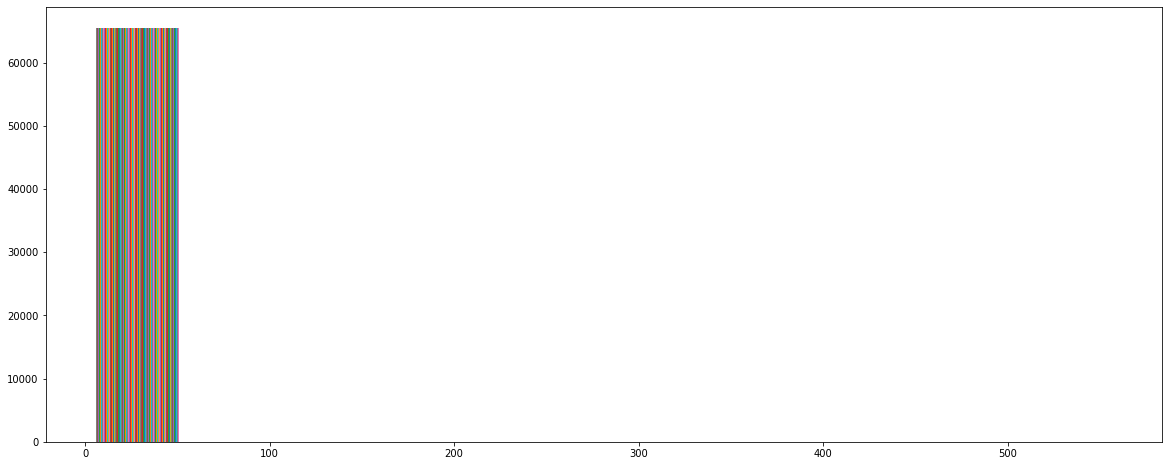

In [ ]:
# reciprocal

# create an array of each image
image_series = df.img_path.apply(create_array)

# apply power transformation
transformed_pixel_values = image_series.apply(lambda x: 1/(x+1))

# plot histogram and check for normal distribution
fig = plt.figure(figsize=(20, 8))
plt.hist(transformed_pixel_values)


In [ ]:
# # plot histogram of sample means 

# # compute mean pixel values of image
# mean_pixel_value = image_series.apply(lambda x: np.nanmean(1/(x+1)))

# # compute std of pixel values of image
# std_pixel_value = image_series.apply(lambda x: np.nanstd(1/(x+1)))

# # plot the distributions of means and stds
# fig = plt.figure(figsize=(20, 8))

# plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
# plt.gca().set_title('Mean'+ str(var_name))
# plt.hist(mean_pixel_value, bins=10)

# plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
# plt.gca().set_title('Std. Deviation' + str(var_name))
# plt.hist(std_pixel_value, bins=10)

# plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


(array([[1.600e+01, 2.800e+01, 9.700e+01, ..., 5.330e+02, 1.171e+03,
         0.000e+00],
        [1.000e+00, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.400e+01, 7.800e+01, 9.000e+01, ..., 5.840e+02, 1.597e+04,
         2.940e+02],
        ...,
        [5.000e+01, 1.540e+02, 3.280e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.300e+01, 3.900e+01, 7.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 4.200e+01, 4.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([0.        , 0.09963437, 0.19926874, 0.2989031 , 0.39853747,
        0.49817184, 0.59780621, 0.69744058, 0.79707494, 0.89670931,
        0.99634368]),
 <a list of 3180 Lists of Patches objects>)

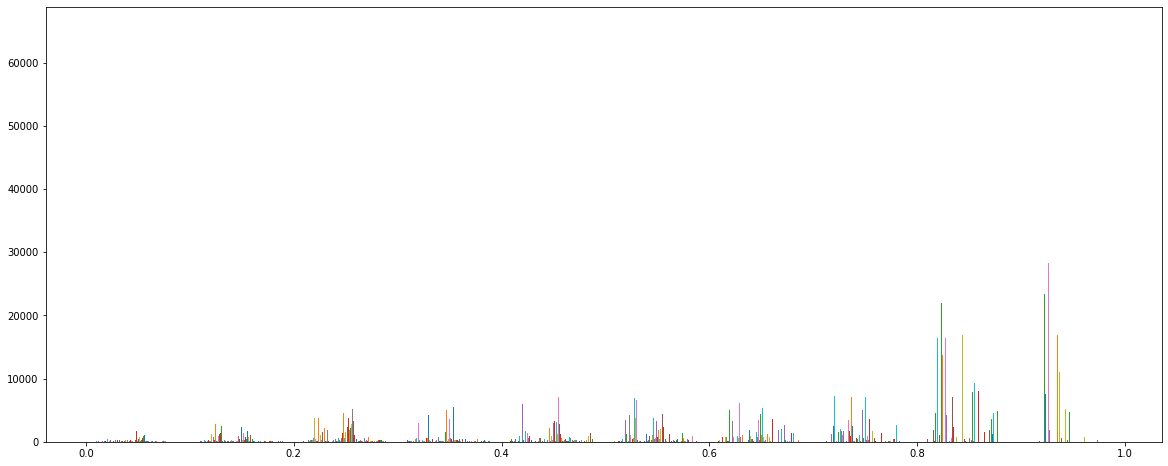

In [ ]:
# squareroot

# create an array of each image
image_series = df.img_path.apply(create_array)

# apply power transformation
transformed_pixel_values = image_series.apply(lambda x: np.sqrt(x))

# plot histogram and check for normal distribution
fig = plt.figure(figsize=(20, 8))
plt.hist(transformed_pixel_values)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: ignored

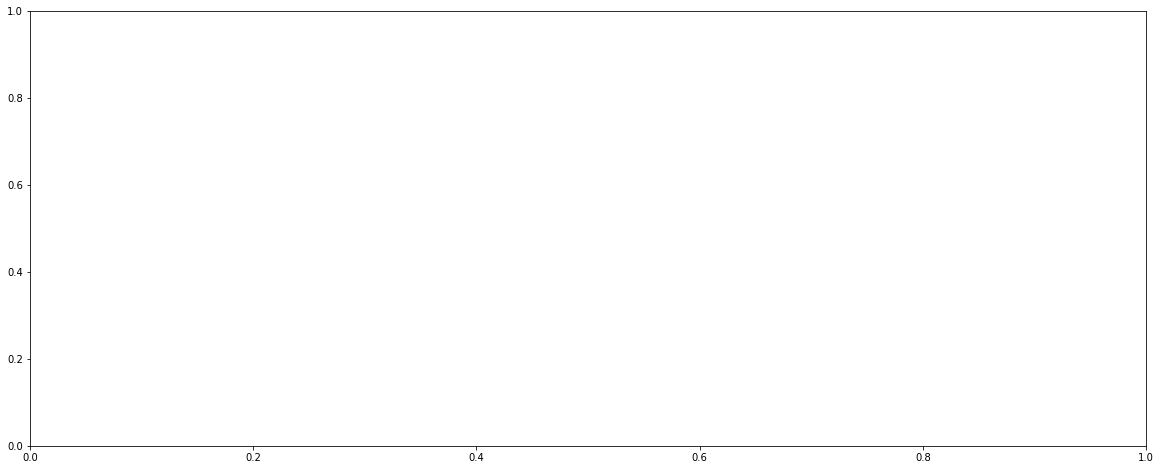

In [ ]:
# log

# create an array of each image
image_series = df.img_path.apply(create_array)

# apply power transformation
transformed_pixel_values = image_series.apply(lambda x: np.log(x))

# plot histogram and check for normal distribution
fig = plt.figure(figsize=(20, 8))
plt.hist(transformed_pixel_values)

### Option 4A: Min-Max Normalization
(we can implement this to normalize data that is still non-normal)

In [ ]:
# Compute min-max pixel values of images

# Min pixel value
min_pixel_values = image_series.apply(lambda x: np.amin(x))
min_value = np.amin(min_pixel_values)

# Max pixel value
max_pixel_values = image_series.apply(lambda x: np.amax(x))
max_value = np.amax(max_pixel_values)

print("Min:", min_value, "\nMax:", max_value)


Min: -0.9902676399026764 
Max: 0.9927007299270073


In [ ]:
# Perform rescaling
rescaled_pixel_values = image_series.apply(lambda x: (x-min_value) / (max_value-min_value))


In [ ]:
# plot histogram and check for normal distribution
fig = plt.figure(figsize=(20, 8))
plt.hist(rescaled_pixel_values)

### Option 4B: Standardization or Z-Score Normalization
(we can implement this if data after power transformation seems normal)

# To visually verify an image using GDAL

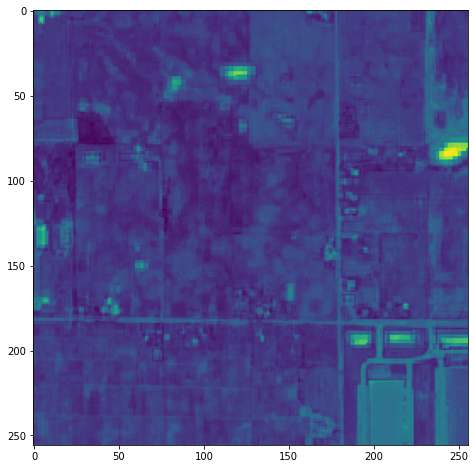

In [ ]:
local_download_path = img_dir

fig = plt.figure(figsize=(8,8))

dataset = gdal.Open(local_download_path+"4717_MVP-2017-00036-AJK_mndwi_hires.tif", gdal.GA_ReadOnly) 
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)
            
plt.show()